# GETTING STARTED
This is interactive code, which runs sequentially in cells. 
You can run each cell independently or run everything all at once.

You cannot run a cell without running the cells above it or it will have errors.

To run everything at once:
- Go to the 'Run' menu at the top. Sometimes this menu is called 'Cells'
- Tap 'Run All Cells'/'Run All'.
- Click the links below to see the fancy plots. They are interactive.


### Links

*These links will not work until you 'Run All Cells' as instructed above*

- [Plot Confirmed Cases by Province/State](#plot_confirmed)
- [Plot Growth by Province/State](#plot_growth)
- [Plot Acceleration by Province/State](#plot_acceleration)

## Download dataset 

Dataset is at https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/

In [1]:
import pandas as pd
import requests
import io
from itertools import product

# Default value of display.max_rows is 10 i.e. at max 10 rows will be printed.
# Set it None to display all rows in the dataframe
pd.set_option('display.max_rows', None)

confirmedUrl = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'

r = requests.get(confirmedUrl)
if r.ok:
    data = r.content.decode('utf8')
    df = pd.read_csv(io.StringIO(data))
    
# Rename Province/State and Country/Region
df = df.rename(columns={'Province_State': 'provincestate', 'Country_Region': 'countryregion', 'Long_': 'Long', 'Admin2': 'municipality'})

# REMOVE IF UNNEEDED
# df['provincestate'] = df['provincestate'] + '-' + df['Admin2']

# Keep only needed columns
df = df.drop(['iso2', 'iso3', 'code3', 'FIPS', 'UID', 'Combined_Key', 'Lat', 'Long'], axis=1)

# df = df.query('provincestate == "{}"'.format('New York')).copy()

df.head()

,municipality,provincestate,countryregion,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20
0,NaN,American Samoa,US,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Guam,US,0,0,0,0,0,0,0,...,55,56,58,69,77,82,84,93,112,113
2,NaN,Northern Mariana Islands,US,0,0,0,0,0,0,0,...,0,0,0,2,6,6,6,6,6,6
3,NaN,Puerto Rico,US,0,0,0,0,0,0,0,...,100,127,174,239,286,316,316,452,475,513
4,NaN,Virgin Islands,US,0,0,0,0,0,0,0,...,22,0,0,30,30,30,37,40,42,43


In [2]:
# Remove unneeded columns
# df = df.drop(['Lat', 'Long', 'provincestate'], axis=1)

# Reshape 
df_confirmed = df.melt(var_name='date', value_name='number', id_vars=['countryregion', 'provincestate', 'municipality'])

df_confirmed.head()

# countries = df_confirmed['countryregion'].unique()
# countries.sort(axis=0)
# print(countries)

,countryregion,provincestate,municipality,date,number
0,US,American Samoa,NaN,1/22/20,0
1,US,Guam,NaN,1/22/20,0
2,US,Northern Mariana Islands,NaN,1/22/20,0
3,US,Puerto Rico,NaN,1/22/20,0
4,US,Virgin Islands,NaN,1/22/20,0


In [3]:
# Restrict to target country
df_confirmed_grouped = df_confirmed.query('countryregion == "{}"'.format('US')).copy()
# df_confirmed_grouped = df_confirmed.query('provincestate == "New York"'.format('US')).copy()
df_confirmed_grouped['provincestate'] = df_confirmed_grouped['provincestate'].fillna('Unknown')

print("{} rows found".format(df_confirmed_grouped.shape[0]))
df_confirmed_grouped.head(10)

247228 rows found


,countryregion,provincestate,municipality,date,number
0,US,American Samoa,NaN,1/22/20,0
1,US,Guam,NaN,1/22/20,0
2,US,Northern Mariana Islands,NaN,1/22/20,0
3,US,Puerto Rico,NaN,1/22/20,0
4,US,Virgin Islands,NaN,1/22/20,0
5,US,Alabama,Autauga,1/22/20,0
6,US,Alabama,Baldwin,1/22/20,0
7,US,Alabama,Barbour,1/22/20,0
8,US,Alabama,Bibb,1/22/20,0
9,US,Alabama,Blount,1/22/20,0


In [4]:
# ## Dates/Provinces with no confirmed are not included in the dataset, so we have to fill these missing rows
# # Create the full combinations of dates and provinces
# dates_unique = df_confirmed_grouped['date'].unique()
# provinces_unique = df_confirmed_grouped['provincestate'].unique()
# df_full = pd.DataFrame(list(product(dates_unique, provinces_unique)), columns=['date', 'provincestate'])
# # Merge the full df with the one with actual data
# df_full = pd.merge(df_full, df_confirmed_grouped, how='outer', on=['date','provincestate']).fillna(0)

# df_confirmed_grouped = df_full.sort_values(['date', 'provincestate'])
# print("{} rows found".format(df_confirmed_grouped.shape[0]))

In [15]:
### Group values by countryregion
df_confirmed_grouped = df_confirmed_grouped.groupby(['date', 'countryregion', 'provincestate']).sum()
df_confirmed_grouped.reset_index(drop=False, inplace=True)
df_confirmed_grouped.head(10)

,date,countryregion,provincestate,number,growth_rate,acceleration
0,4/1/20,US,Alabama,1060,212.0,39.44
1,4/1/20,US,Alaska,132,26.4,26.48
2,4/1/20,US,American Samoa,0,0.0,2.64
3,4/1/20,US,Arizona,1530,305.6,39.92
4,4/1/20,US,Arkansas,584,116.8,8.88
5,4/1/20,US,California,9399,1870.0,380.40
6,4/1/20,US,Colorado,2982,595.8,275.60
7,4/1/20,US,Connecticut,3557,711.4,129.06
8,4/1/20,US,Delaware,368,73.6,-124.50
9,4/1/20,US,Diamond Princess,49,9.8,-424.26


In [16]:
### Restrict to after 4/1/2020, due to unclean data
df_confirmed_grouped = df_confirmed_grouped.query('date >= "{}"'.format('4/1/20')).copy()
df_confirmed_grouped.head(10)

,date,countryregion,provincestate,number,growth_rate,acceleration
0,4/1/20,US,Alabama,1060,212.0,39.44
1,4/1/20,US,Alaska,132,26.4,26.48
2,4/1/20,US,American Samoa,0,0.0,2.64
3,4/1/20,US,Arizona,1530,305.6,39.92
4,4/1/20,US,Arkansas,584,116.8,8.88
5,4/1/20,US,California,9399,1870.0,380.40
6,4/1/20,US,Colorado,2982,595.8,275.60
7,4/1/20,US,Connecticut,3557,711.4,129.06
8,4/1/20,US,Delaware,368,73.6,-124.50
9,4/1/20,US,Diamond Princess,49,9.8,-424.26


## Calculate metrics

In [23]:
# Calculate change
window = 3
growthCalculation = lambda x: (x.max())

from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()

x = pd.Series(range(0,window)).values.reshape(-1,1)
linearCoefficient = lambda values: (linear_regressor.fit(x, values.values.reshape(-1,1)).coef_)

df_confirmed_grouped['growth_rate'] = df_confirmed_grouped.groupby(['provincestate'])['number'].rolling(window).apply(linearCoefficient).fillna(0).reset_index(level=0, drop=True)
df_confirmed_grouped.head(10)

,date,countryregion,provincestate,number,growth_rate,acceleration
0,4/1/20,US,Alabama,1060,0.0,0.0
1,4/1/20,US,Alaska,132,0.0,0.0
2,4/1/20,US,American Samoa,0,0.0,0.0
3,4/1/20,US,Arizona,1530,0.0,0.0
4,4/1/20,US,Arkansas,584,0.0,0.0
5,4/1/20,US,California,9399,0.0,0.0
6,4/1/20,US,Colorado,2982,0.0,0.0
7,4/1/20,US,Connecticut,3557,0.0,0.0
8,4/1/20,US,Delaware,368,0.0,0.0
9,4/1/20,US,Diamond Princess,49,0.0,0.0


In [24]:
df_confirmed_grouped['acceleration'] = df_confirmed_grouped['growth_rate'].rolling(window).apply(linearCoefficient).fillna(0)
df_confirmed_grouped.head(10)

,date,countryregion,provincestate,number,growth_rate,acceleration
0,4/1/20,US,Alabama,1060,0.0,0.0
1,4/1/20,US,Alaska,132,0.0,0.0
2,4/1/20,US,American Samoa,0,0.0,0.0
3,4/1/20,US,Arizona,1530,0.0,0.0
4,4/1/20,US,Arkansas,584,0.0,0.0
5,4/1/20,US,California,9399,0.0,0.0
6,4/1/20,US,Colorado,2982,0.0,0.0
7,4/1/20,US,Connecticut,3557,0.0,0.0
8,4/1/20,US,Delaware,368,0.0,0.0
9,4/1/20,US,Diamond Princess,49,0.0,0.0


## Plot
### Prepare chart

In [25]:
# Show fig
import plotly.express as px
import plotly.graph_objects as go

colorSequence = ["red", "royalblue"]

layout = go.Layout(title="COVID-19 confirmed cases by province/state", margin={"l": 100, "r": 100},
                   colorway=["#287D95", "#EF533B"], legend={"x": 0.7, "y": 1, 'orientation': "h"},
                   yaxis={'title': 'Confirmed cases'},                   
                   xaxis={"title": "Date",
                         'domain': [0, 0.92]},
                   height=1000)

chinaColor = colorSequence[0]

# Only plot 'number', since we can't control the dashed lines and second-axes using Plotly Express
trace_confirmed = px.line(df_confirmed_grouped, 
                           x='date', 
                           y='number', 
                           color='provincestate',).data

# Add growth rate
trace_growth = px.line(df_confirmed_grouped, 
                           x='date', 
                           y='growth_rate', 
                           color='provincestate',).data

# Add acceleration
trace_accel = px.line(df_confirmed_grouped, 
                           x='date', 
                           y='acceleration', 
                           color='provincestate',).data

<a id='plot_confirmed'></a>
### Plot Confirmed Cases by Province/State

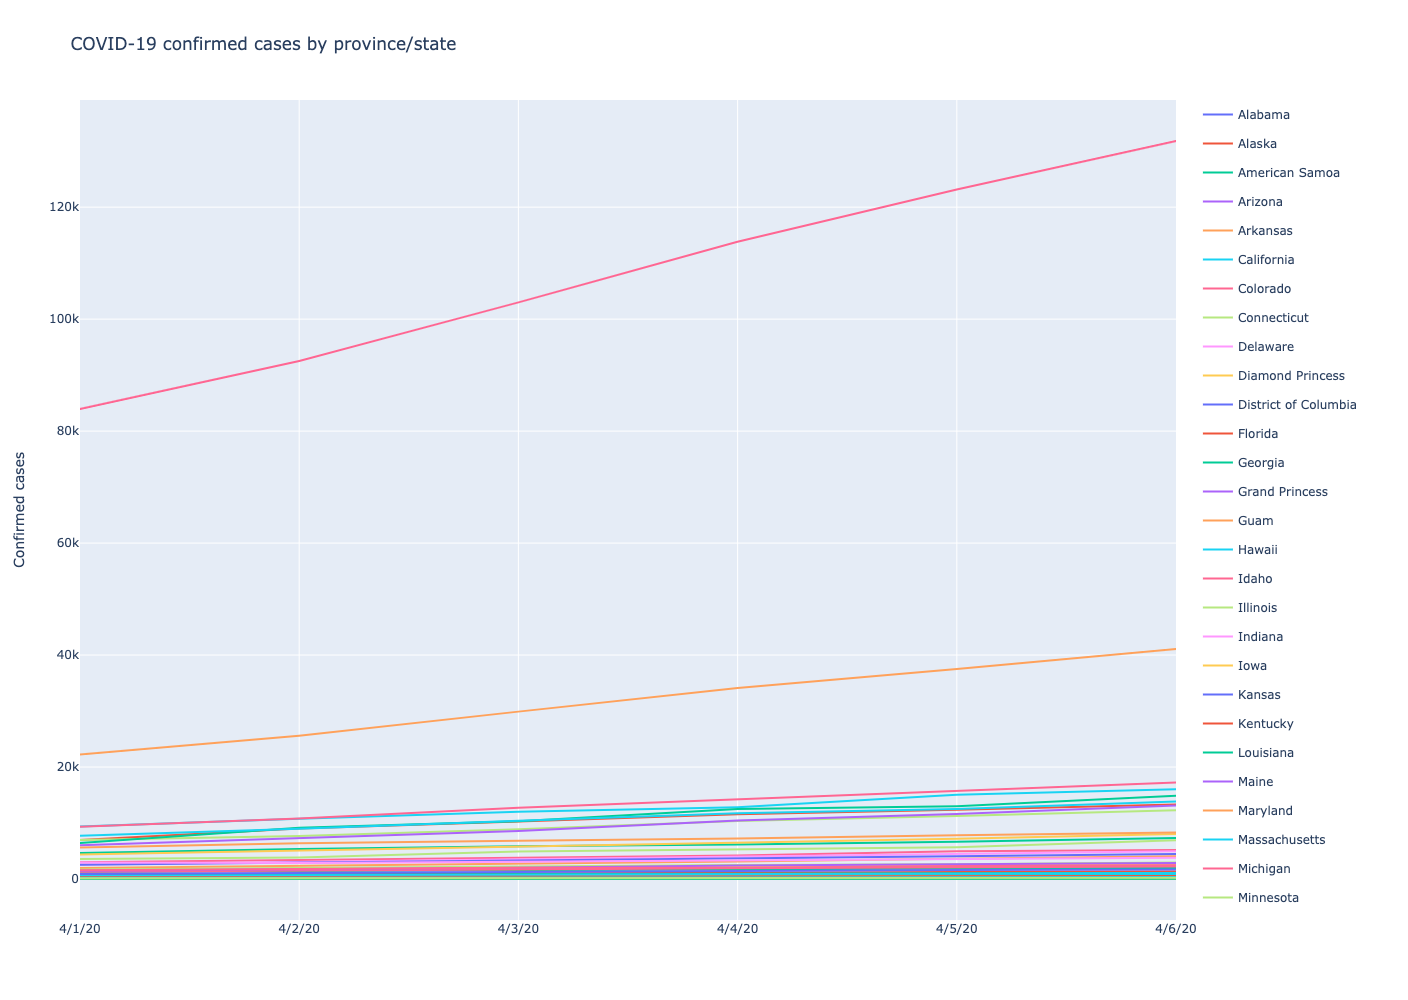

In [26]:
layout = go.Layout(title="COVID-19 confirmed cases by province/state",
                   yaxis={'title': 'Confirmed cases'},
                   height=1000)

fig = go.Figure(data=trace_confirmed, layout=layout)
fig.show()

<a id='plot_growth'></a>
### Plot Growth Rate by Province/State

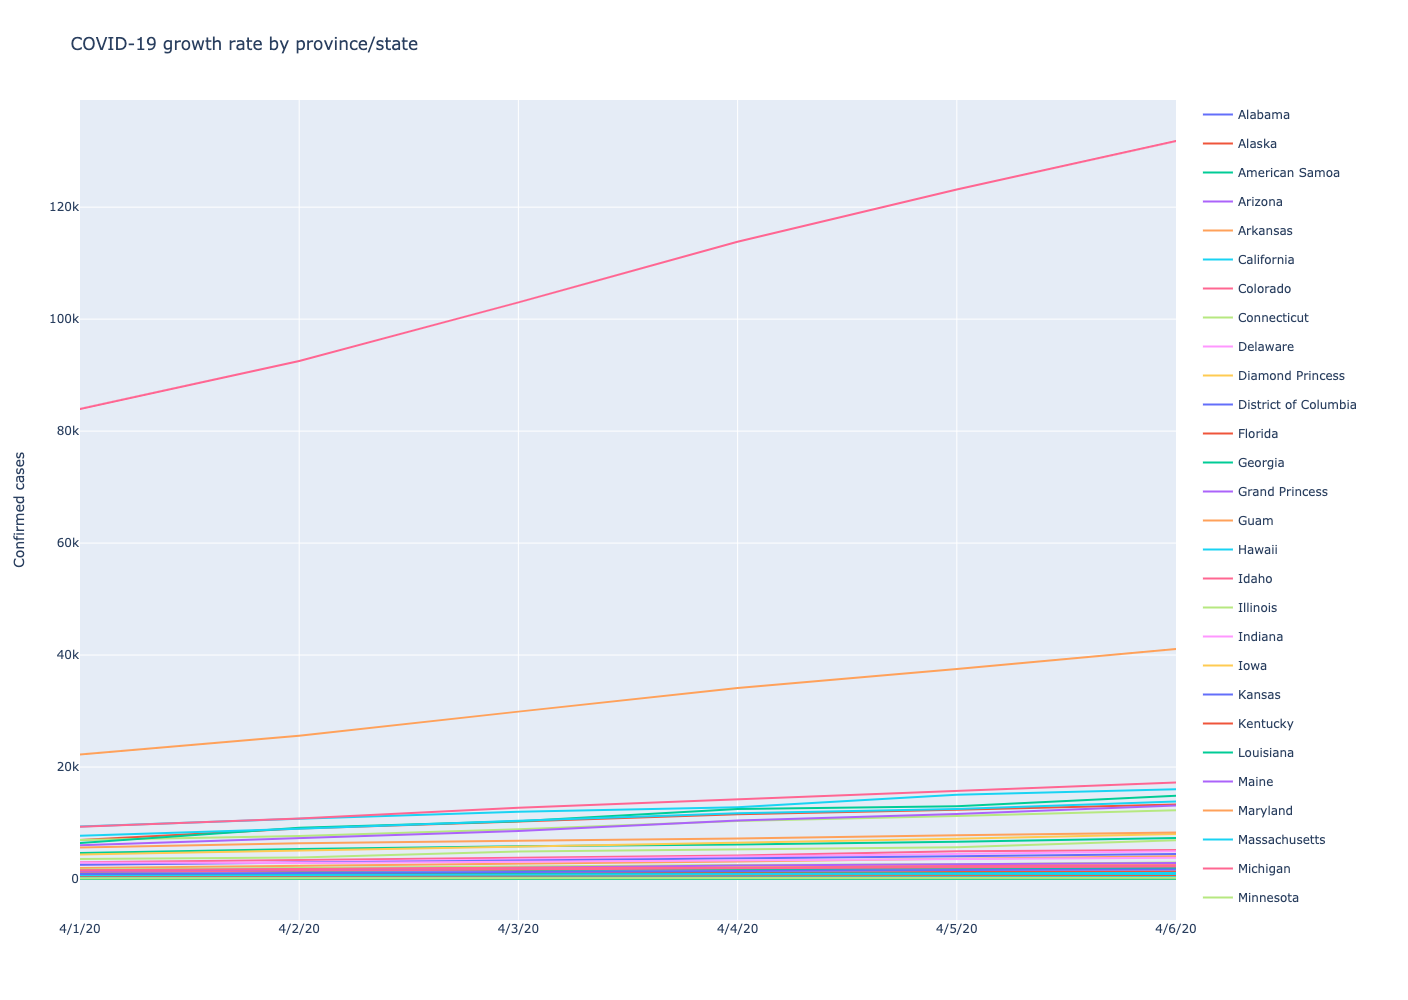

In [27]:
layout = go.Layout(title="COVID-19 growth rate by province/state",
                   yaxis={'title': 'Confirmed cases'},
                   height=1000)

fig = go.Figure(data=trace_confirmed, layout=layout)
fig.show()

<a id='plot_acceleration'></a>
### Plot Acceleration by Province/State

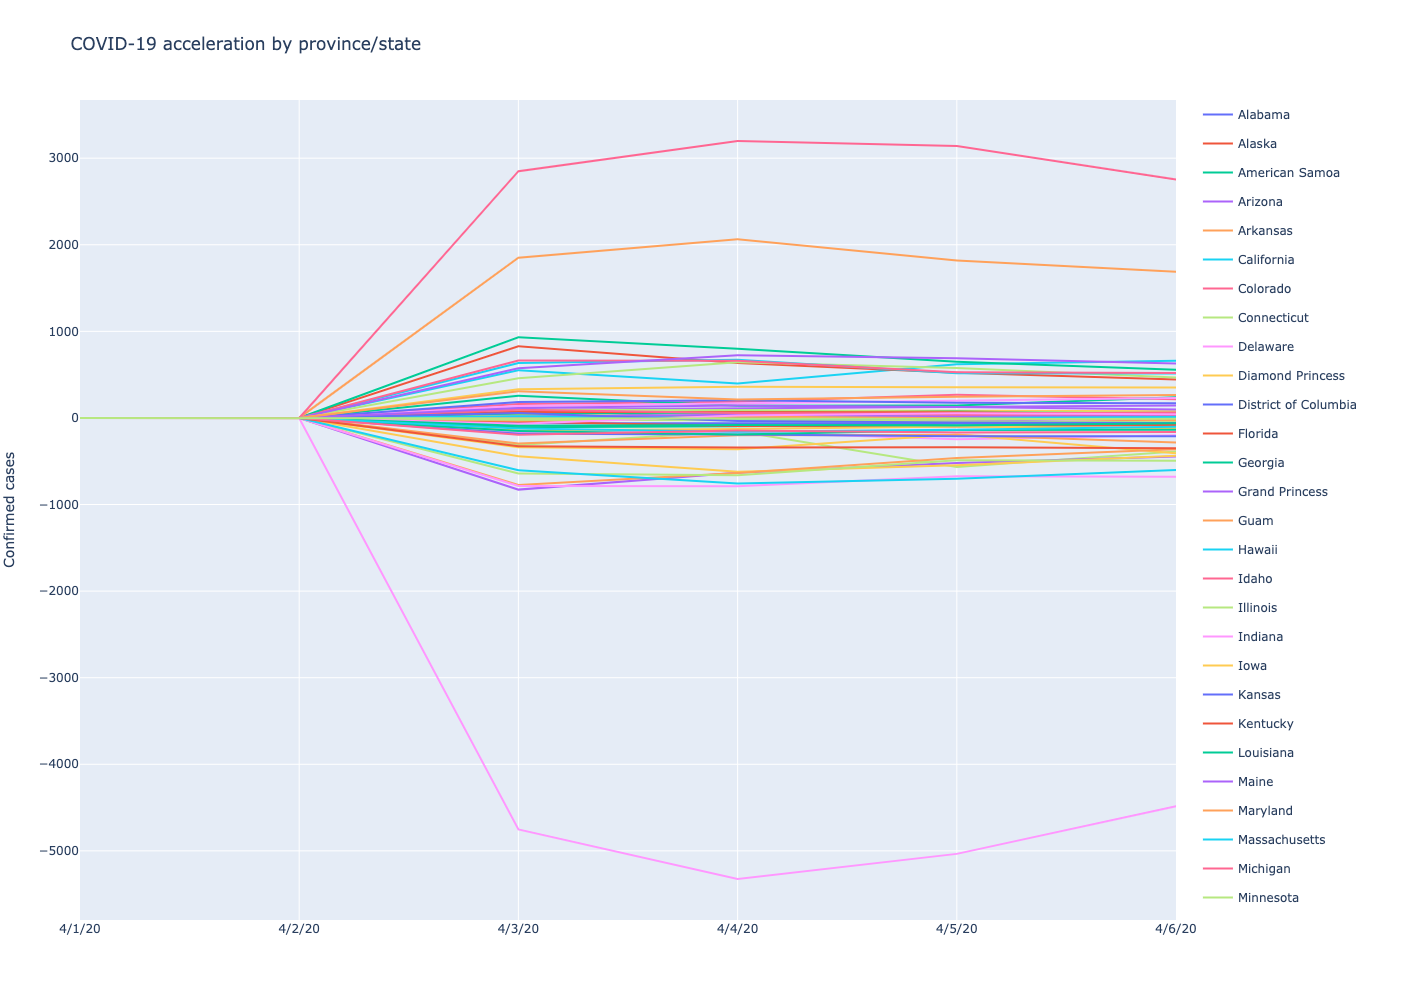

In [28]:
layout = go.Layout(title="COVID-19 acceleration by province/state",
                   yaxis={'title': 'Confirmed cases'},
                   height=1000)

fig = go.Figure(data=trace_accel, layout=layout)
fig.show()